In [1]:
from torchvision.models import vgg19

In [2]:
model = vgg19(weights = "DEFAULT")

In [3]:
from torchvision.models import VGG19_Weights

In [4]:
VGG19_Weights.IMAGENET1K_V1.meta["categories"][694]

'paddlewheel'

In [30]:
txtFile = open("./imagenet2coco.txt", "r").read()

In [31]:
mapping = dict([tuple([line.split("\t")[1].split(",")[0], line.split("\t")[2]]) for line in txtFile.splitlines()])

In [7]:
mapping

{'tench': 'None',
 'goldfish': 'None',
 'great white shark': 'None',
 'tiger shark': 'None',
 'hammerhead': 'None',
 'electric ray': 'None',
 'stingray': 'None',
 'cock': 'None',
 'hen': 'bird',
 'ostrich': 'bird',
 'brambling': 'bird',
 'goldfinch': 'bird',
 'house finch': 'bird',
 'junco': 'bird',
 'indigo bunting': 'bird',
 'robin': 'bird',
 'bulbul': 'bird',
 'jay': 'person',
 'magpie': 'bird',
 'chickadee': 'bird',
 'water ouzel': 'bird',
 'kite': 'kite',
 'bald eagle': 'bird',
 'vulture': 'bird',
 'great grey owl': 'bird',
 'European fire salamander': 'None',
 'common newt': 'None',
 'eft': 'None',
 'spotted salamander': 'None',
 'axolotl': 'None',
 'bullfrog': 'None',
 'tree frog': 'None',
 'tailed frog': 'None',
 'loggerhead': 'None',
 'leatherback turtle': 'None',
 'mud turtle': 'None',
 'terrapin': 'None',
 'box turtle': 'None',
 'banded gecko': 'None',
 'common iguana': 'None',
 'American chameleon': 'None',
 'whiptail': 'None',
 'agama': 'None',
 'frilled lizard': 'None',
 

In [6]:
import pandas as pd
import os
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image

In [7]:
subjImgData =pd.read_pickle("../MQPCode/test/subjCocoImgData/subj01ImgData.pkl")

In [10]:
subjImgData["classLabel"]

0              chair
1               bowl
2       dining table
3             person
4               bird
            ...     
9836          person
9837          bottle
9838              tv
9839            bowl
9840            bird
Name: classLabel, Length: 9841, dtype: object

In [8]:
class AlgonautsDataset(Dataset):
    def __init__(self, parentDir: str, metaDataPath: str, subj: int, dataIdxs: list = None, transform = None):
        self.imagesPath = os.path.join(parentDir, f"subj0{subj}/training_split/training_images/")
        self.imagePaths = np.array(os.listdir(self.imagesPath))
        self.imageData = pd.read_pickle(metaDataPath)["classLabel"]
        self.transform = transform
        if dataIdxs is not None:
            self.imagePaths = self.imagePaths[dataIdxs]
    def __len__(self):
        return len(self.imagePaths)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        imagePath = os.path.join(self.imagesPath, self.imagePaths[idx])
        image = Image.open(imagePath)
        label = self.imageData[idx]
        if self.transform:
            image = self.transform(image)
        return image, imagePath, label


In [9]:
dataDir = "C:/Users/josem/Documents/schoolWork/MQP/algonauts2023_transformers#2Leader/algonauts_2023_challenge_data"

In [10]:
tsfms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

In [11]:
dataset = AlgonautsDataset(dataDir, "../MQPCode/test/subjCocoImgData/subj01ImgData.pkl", 1, transform=tsfms)

In [14]:
list(mapping.keys())[532]

'dining table, board'

In [12]:
vggClasses = VGG19_Weights.IMAGENET1K_V1.meta["categories"]

In [13]:
otherClasses = list(mapping.keys())

In [19]:
len(otherClasses)

1000

In [20]:
len(vggClasses)

1000

In [28]:
vggClasses[639]

'maillot tank suit'

In [29]:
otherClasses[639]

'maillot, tank suit'

In [19]:
for i in range(len(vggClasses)):
    word = otherClasses[i]
    if word != vggClasses[i]:
        print(f"{i} {word}")

In [26]:
torch.topk(resp, 5)

torch.return_types.topk(
values=tensor([[8.9375, 8.0770, 7.7255, 7.6365, 7.3908]], grad_fn=<TopkBackward0>),
indices=tensor([[532, 520, 526, 706, 453]]))

In [14]:
import matplotlib.pyplot as plt

In [32]:
p = dataset.__getitem__(0)[0].numpy()

In [ ]:
np.perm

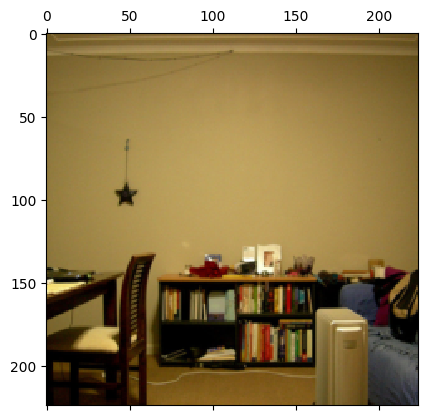

In [33]:
plt.matshow(dataset.__getitem__(0)[0].permute(1,2,0))

In [14]:
dataloader = DataLoader(dataset, batch_size=8)

In [27]:
nums = [532, 526, 520, 706, 453]

for i in nums:    
    print(VGG19_Weights.IMAGENET1K_V1.meta["categories"][i])
    print(mapping[VGG19_Weights.IMAGENET1K_V1.meta["categories"][i]])
    print()

dining table
None

desk
None

crib
None

patio
None

bookcase
None



In [15]:
for data in dataloader:
    thing = data
    break

In [18]:
vggPred = model(thing[0])

In [19]:
top10 = torch.topk(vggPred, 10)

In [20]:
def printClass(i):
    return vggClasses[i]

printC = np.vectorize(printClass)
print(printC(top10.indices.numpy()))

[['dining table' 'desk' 'bookcase' 'studio couch' 'china cabinet'
  'microwave' 'crib' 'restaurant' 'library' 'photocopier']
 ['bakery' 'grocery store' 'confectionery' 'trifle' 'hotdog' 'crate'
  'tub' 'tray' 'eggnog' 'shopping basket']
 ['face powder' 'menu' 'plate rack' 'envelope' 'tray' 'packet' 'lotion'
  'book jacket' 'bakery' 'plate']
 ['whippet' 'Saluki' 'Weimaraner' 'Ibizan hound' 'dingo'
  'Italian greyhound' 'sandbar' 'Chesapeake Bay retriever' 'redbone'
  'vizsla']
 ['tub' 'shower curtain' 'soap dispenser' 'washbasin' 'bathtub' 'teapot'
  'washer' 'toilet seat' 'dishwasher' 'axolotl']
 ['tray' 'dough' 'bakery' 'cauliflower' 'chest' 'dining table' 'carton'
  'honeycomb' 'ice cream' 'mixing bowl']
 ['bathtub' 'tub' 'toilet seat' 'washbasin' 'washer' 'medicine chest'
  'shower curtain' 'cradle' 'studio couch' 'dishwasher']
 ['cradle' 'crib' 'bassinet' 'studio couch' 'plate rack' 'rocking chair'
  'bannister' 'picket fence' 'crate' 'quilt']]


In [21]:
top10Array = top10.indices.numpy()
 
def mapTopClasses(i):
    return mapping[vggClasses[i]]
   
applyall = np.vectorize(mapTopClasses)
res = applyall(top10Array)
print(res)

[['None' 'None' 'None' 'sofa' 'None' 'microwave' 'None' 'None' 'None'
  'None']
 ['None' 'None' 'None' 'None' 'sandwich' 'None' 'None' 'None' 'None'
  'None']
 ['None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None']
 ['dog' 'dog' 'dog' 'dog' 'None' 'dog' 'None' 'dog' 'dog' 'dog']
 ['None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None']
 ['None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'bowl']
 ['None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'sofa' 'None']
 ['None' 'None' 'None' 'sofa' 'None' 'chair' 'None' 'None' 'None' 'None']]


In [30]:
top10Array

array([[532, 453, 526, 520, 831, 706, 495, 762, 757, 660],
       [415, 509, 969, 961, 927, 582, 868, 599, 931, 729],
       [551, 868, 922, 729, 549, 495, 415, 969, 923, 711],
       [172, 209, 178, 176, 173, 273, 211, 171, 225, 168],
       [794, 849,  29, 876, 435, 786, 896,   1, 971, 868],
       [868, 961, 415, 938, 549, 599, 923, 470, 876, 659],
       [435, 876, 648, 896, 861, 794, 897, 894, 549, 516],
       [516, 520, 431, 716, 765, 729, 519, 669, 421, 912]], dtype=int64)

In [28]:
top10.indices

tensor([[532, 453, 526, 520, 831, 706, 495, 762, 757, 660],
        [415, 509, 969, 961, 927, 582, 868, 599, 931, 729],
        [551, 868, 922, 729, 549, 495, 415, 969, 923, 711],
        [172, 209, 178, 176, 173, 273, 211, 171, 225, 168],
        [794, 849,  29, 876, 435, 786, 896,   1, 971, 868],
        [868, 961, 415, 938, 549, 599, 923, 470, 876, 659],
        [435, 876, 648, 896, 861, 794, 897, 894, 549, 516],
        [516, 520, 431, 716, 765, 729, 519, 669, 421, 912]])

In [22]:
from ultralytics import YOLO

In [48]:
yoloModel = YOLO('yolov8n.pt')
results = []
yoloModel

words = ['furniture', 'food', 'kitchenware', 'appliance', 'person', 'animal', 'vehicle', 'accessory',
            'electronics', 'sports', 'traffic', 'outdoor', 'home', 'clothing', 'hygiene', 'toy', 'plumbing',
            'safety', 'luggage', 'computer', 'fruit', 'vegetable', 'tool']

class_mapping = {
    'chair': 'furniture',
    'bowl': 'kitchenware',
    'dining table': 'furniture',
    'person': 'person',
    'bird': 'animal',
    'knife': 'kitchenware',
    'sink': 'appliance',
    'horse': 'animal',
    'cake': 'food',
    'giraffe': 'animal',
    'car': 'vehicle',
    'umbrella': 'accessory',
    'refrigerator': 'appliance',
    'cow': 'animal',
    'dog': 'animal',
    'tv': 'electronics',
    'surfboard': 'sports',
    'cat': 'animal',
    'stop sign': 'traffic',
    'train': 'vehicle',
    'zebra': 'animal',
    'carrot': 'vegetable',
    'bicycle': 'vehicle',
    'sports ball': 'sports',
    'sheep': 'animal',
    'motorcycle': 'vehicle',
    'bottle': 'kitchenware',
    'sandwich': 'food',
    'clock': 'home',
    'bear': 'animal',
    'truck': 'vehicle',
    'traffic light': 'traffic',
    'cell phone': 'electronics',
    'oven': 'appliance',
    'cup': 'kitchenware',
    'couch': 'furniture',
    'airplane': 'vehicle',
    'boat': 'vehicle',
    'bus': 'vehicle',
    'broccoli': 'vegetable',
    'tennis racket': 'sports',
    'elephant': 'animal',
    'parking meter': 'traffic',
    'tie': 'clothing',
    'bed': 'furniture',
    'toaster': 'appliance',
    'banana': 'fruit',
    'toothbrush': 'hygiene',
    'kite': 'toy',
    'skateboard': 'sports',
    'potted plant': 'home',
    'bench': 'outdoor',
    'donut': 'food',
    'spoon': 'kitchenware',
    'toilet': 'plumbing',
    'baseball bat': 'sports',
    'pizza': 'food',
    'scissors': 'tool',
    'fire hydrant': 'outdoor',
    'teddy bear': 'toy',
    'remote': 'electronics',
    'apple': 'fruit',
    'suitcase': 'luggage',
    'vase': 'home',
    'skis': 'sports',
    'hot dog': 'food',
    'frisbee': 'toy',
    'backpack': 'luggage',
    'microwave': 'appliance',
    'wine glass': 'kitchenware',
    'snowboard': 'sports',
    'baseball glove': 'sports',
    'book': 'toy',
    'orange': 'fruit',
    'fork': 'kitchenware',
    'laptop': 'electronics',
    'handbag': 'accessory',
    'keyboard': 'computer',
    'mouse': 'computer',
    'hair drier' : "electronics"
}

for data in dataloader:
    batch_imgs = data[0]
    image_results = yoloModel.predict(batch_imgs, stream=True)
    names = yoloModel.names

    for i, result in enumerate(image_results):
        detection_count = result.boxes.shape[0]

        best_confidence = 0.3
        best_item = None
        for j in range(len(result.boxes)):
            confidence = float(result.boxes.conf[j].item())
            if confidence > best_confidence:
                cls = int(result.boxes.cls[j].item())
                name = names[cls]
                Mapname = class_mapping.get(name)
                print(Mapname)
                num = words.index(Mapname)
                best_confidence = confidence

                if best_item is None or confidence > best_item['confidence']:
                    best_item = {
                        'cls': cls,
                        'name': name,
                        'num': num,
                        'confidence': confidence
                    }
        if best_item:
            results.append([name, Mapname])
        else:

            results.append([-1, -1])

    break


0: 224x224 1 chair, 1: 224x224 6 donuts, 2: 224x224 12 bowls, 1 dining table, 3: 224x224 3 persons, 1 surfboard, 4: 224x224 1 bird, 1 chair, 5: 224x224 1 cup, 1 knife, 1 carrot, 1 dining table, 6: 224x224 1 sink, 7: 224x224 1 bench, 2 teddy bears, 10.7ms
Speed: 0.2ms preprocess, 1.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 224)


furniture
food
kitchenware
person
animal
kitchenware
appliance
toy


In [29]:
results

[['chair', 'furniture'],
 ['donut', 'food'],
 ['bowl', 'kitchenware'],
 ['person', 'person'],
 ['bird', 'animal'],
 ['knife', 'kitchenware'],
 ['sink', 'appliance'],
 ['teddy bear', 'toy']]

In [49]:
t1 = sorted(list(class_mapping.keys()))
t2 = sorted(list(yoloModel.names.values()))

for i in range(len(t1)):
    if t1[i] != t2[i]:
        print(f"{t1[i]} {t2[i]}")

In [51]:
printC(top10.indices.numpy())

array([['dining table', 'desk', 'bookcase', 'studio couch', 'china cabinet', 'microwave', 'crib', 'restaurant', 'library', 'photocopier'],
       ['bakery', 'grocery store', 'confectionery', 'trifle', 'hotdog', 'crate', 'tub', 'tray', 'eggnog', 'shopping basket'],
       ['face powder', 'menu', 'plate rack', 'envelope', 'tray', 'packet', 'lotion', 'book jacket', 'bakery', 'plate'],
       ['whippet', 'Saluki', 'Weimaraner', 'Ibizan hound', 'dingo', 'Italian greyhound', 'sandbar', 'Chesapeake Bay retriever', 'redbone', 'vizsla'],
       ['tub', 'shower curtain', 'soap dispenser', 'washbasin', 'bathtub', 'teapot', 'washer', 'toilet seat', 'dishwasher', 'axolotl'],
       ['tray', 'dough', 'bakery', 'cauliflower', 'chest', 'dining table', 'carton', 'honeycomb', 'ice cream', 'mixing bowl'],
       ['bathtub', 'tub', 'toilet seat', 'washbasin', 'washer', 'medicine chest', 'shower curtain', 'cradle', 'studio couch', 'dishwasher'],
       ['cradle', 'crib', 'bassinet', 'studio couch', 'plate 

In [53]:
subjImgData["classLabel"][:8]

0           chair
1            bowl
2    dining table
3          person
4            bird
5           knife
6            sink
7           chair
Name: classLabel, dtype: object